# The script contains
1. Import libraries and data
2. Create subset
3. Decomposition
4. Test for stationarity
5. Check for autocorrelations

# 1. Import libraries and data

In [147]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [148]:
# Configure API key 

quandl.ApiConfig.api_key = 'yourAPIkey'

In [149]:
path = r'C:\Users\Tim\Desktop\Data Analytics Intro\6. Advanced Analytics & Dashboard Design\Global Superstore_Data Analysis Project'

In [150]:
super_store = pd.read_csv(os.path.join(path, '02. Data', 'Prepared Data', 'superstore_clean.csv'))

In [151]:
pd.set_option('display.max_columns', None)
super_store.head()

,Unnamed: 0,Category,City,Country,Customer.ID,Discount,Market,Order.Date,Order.ID,Order.Priority,Product.ID,Product.Name,Profit,Quantity,Region,Row.ID,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,0,Office Supplies,Los Angeles,United States,LS-172304,0.0,US,2011-01-07 00:00:00.000,CA-2011-130813,High,OFF-PA-10002005,Xerox 225,9.3312,3,West,36624,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,1,Office Supplies,Los Angeles,United States,MV-174854,0.0,US,2011-01-21 00:00:00.000,CA-2011-148614,Medium,OFF-PA-10002893,"Wirebound Service Call Books, 5 1/2"" x 4""",9.2928,2,West,37033,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,2,Office Supplies,Los Angeles,United States,CS-121304,0.0,US,2011-08-05 00:00:00.000,CA-2011-118962,Medium,OFF-PA-10000659,"Adams Phone Message Book, Professional, 400 Me...",9.8418,3,West,31468,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,3,Office Supplies,Los Angeles,United States,CS-121304,0.0,US,2011-08-05 00:00:00.000,CA-2011-118962,Medium,OFF-PA-10001144,Xerox 1913,53.2608,2,West,31469,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,4,Office Supplies,Los Angeles,United States,AP-109154,0.0,US,2011-09-29 00:00:00.000,CA-2011-146969,High,OFF-PA-10002105,Xerox 223,3.1104,1,West,32440,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40


In [153]:
print(super_store.columns)

Index(['Unnamed: 0', 'Category', 'City', 'Country', 'Customer.ID', 'Discount',
       'Market', 'Order.Date', 'Order.ID', 'Order.Priority', 'Product.ID',
       'Product.Name', 'Profit', 'Quantity', 'Region', 'Row.ID', 'Sales',
       'Segment', 'Ship.Date', 'Ship.Mode', 'Shipping.Cost', 'State',
       'Sub.Category', 'Year', 'Market2', 'weeknum'],
      dtype='object')


In [154]:
# Drop irrelevant columns and re-export new version
super_store = super_store.drop(columns = ['Unnamed: 0'])
super_store.to_csv(os.path.join(path, '02. Data','Prepared Data', 'superstore_clean.csv'))
super_store.head(5)

,Category,City,Country,Customer.ID,Discount,Market,Order.Date,Order.ID,Order.Priority,Product.ID,Product.Name,Profit,Quantity,Region,Row.ID,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,0.0,US,2011-01-07 00:00:00.000,CA-2011-130813,High,OFF-PA-10002005,Xerox 225,9.3312,3,West,36624,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,0.0,US,2011-01-21 00:00:00.000,CA-2011-148614,Medium,OFF-PA-10002893,"Wirebound Service Call Books, 5 1/2"" x 4""",9.2928,2,West,37033,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,0.0,US,2011-08-05 00:00:00.000,CA-2011-118962,Medium,OFF-PA-10000659,"Adams Phone Message Book, Professional, 400 Me...",9.8418,3,West,31468,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,0.0,US,2011-08-05 00:00:00.000,CA-2011-118962,Medium,OFF-PA-10001144,Xerox 1913,53.2608,2,West,31469,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,0.0,US,2011-09-29 00:00:00.000,CA-2011-146969,High,OFF-PA-10002105,Xerox 223,3.1104,1,West,32440,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40


# 2. Create subset

A row for the timestamp is used to conduct the time series analysis. This is a row that shows one value for each month. It is then grouped by date. The average order date provides a global view of the global sales over time. This was selected as it is well represented in all sales among other variables. 

In [155]:
# Create a subset with the desired columns
super_store_sub = super_store[['Order.Date', 'Sales']]

In [156]:
# Group by date with the mean of the avg delay
super_store_sub = super_store_sub.groupby('Order.Date')['Sales'].mean()

In [18]:
super_store_sub.head()

Order.Date
2011-01-01 00:00:00.000    134.666667
2011-01-02 00:00:00.000    314.000000
2011-01-03 00:00:00.000    225.100000
2011-01-04 00:00:00.000    175.562500
2011-01-05 00:00:00.000    523.428571
Name: Sales, dtype: float64

Super_store_sub is a Serie, and to turn into a panda DataFrame with "Date" as index.

In [157]:
# Turn df_sub into data frame
super_store_sub = super_store_sub.reset_index()
super_store_sub

,Order.Date,Sales
0,2011-01-01 00:00:00.000,134.666667
1,2011-01-02 00:00:00.000,314.000000
2,2011-01-03 00:00:00.000,225.100000
3,2011-01-04 00:00:00.000,175.562500
4,2011-01-05 00:00:00.000,523.428571
...,...,...
1425,2014-12-27 00:00:00.000,248.481481
1426,2014-12-28 00:00:00.000,126.615385
1427,2014-12-29 00:00:00.000,216.431034
1428,2014-12-30 00:00:00.000,213.075949


In [158]:
super_store_sub['datetime'] = pd.to_datetime(super_store_sub['Order.Date']) # Create a datetime column from "Date.""
super_store_sub = super_store_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
super_store_sub.drop(['Order.Date'], axis=1, inplace=True) # Drop the "Date" column.
super_store_sub.head()

,Sales
datetime,
2011-01-01,134.666667
2011-01-02,314.000000
2011-01-03,225.100000
2011-01-04,175.562500
2011-01-05,523.428571


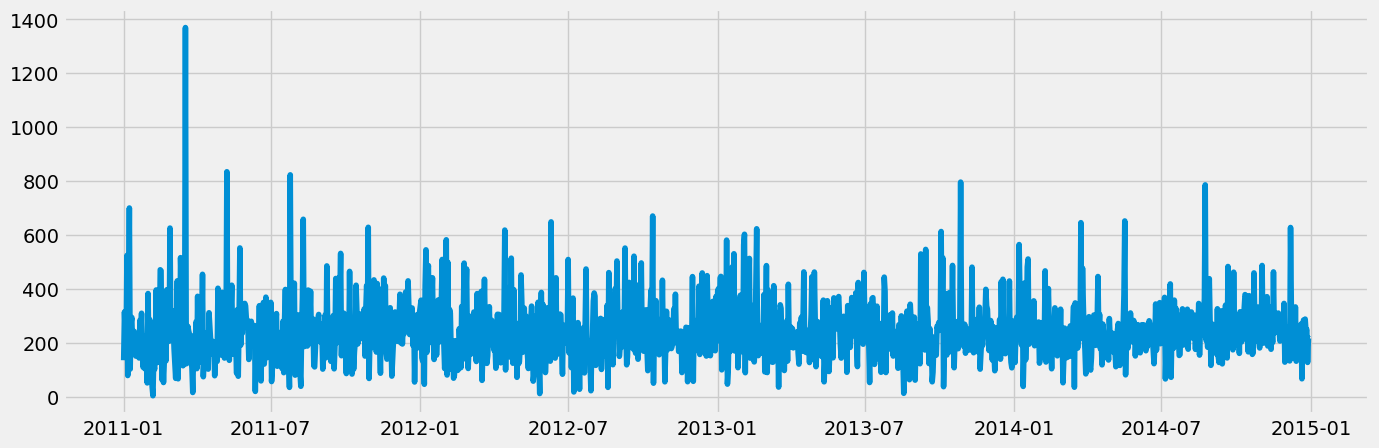

In [159]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(super_store_sub)

Observation:
There seems to be a big stationary time series component of the analysis overtime in the period under review.  

In [160]:
# Check for missing values
super_store_sub.isnull().sum() 

Sales    0
dtype: int64

In [161]:
dups = super_store.duplicated()

In [162]:
dups.shape # No dups

(51290,)

In [163]:
# Check for duplicates
dups = super_store_sub.duplicated()
dups.sum()
# 20 dups

20

# 3. Decomposition

In [164]:
# Create a date range with a start date and number of periods (steps)
date_range = pd.date_range(start='2011-01-01', periods=10, freq='D')

In [165]:
date_range = pd.date_range(start='2011-01-01', end='2015-01-10', freq='D')

In [166]:
# Example time series data
data = pd.Series([234, 250, 290, 320, 310, 400, 410, 450, 460, 470, 480, 500,
                  520, 530, 540, 550, 560, 580, 590, 600, 620, 630, 640, 660],
                 index=pd.date_range('2011-01-01', periods=24, freq='M'))

In [167]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

This is changes behaviour in a linear fashion, not exponential. An additive model will be used.

In [168]:
# Decomposition with sufficient data
decomposition = sm.tsa.seasonal_decompose(data, model='additive')

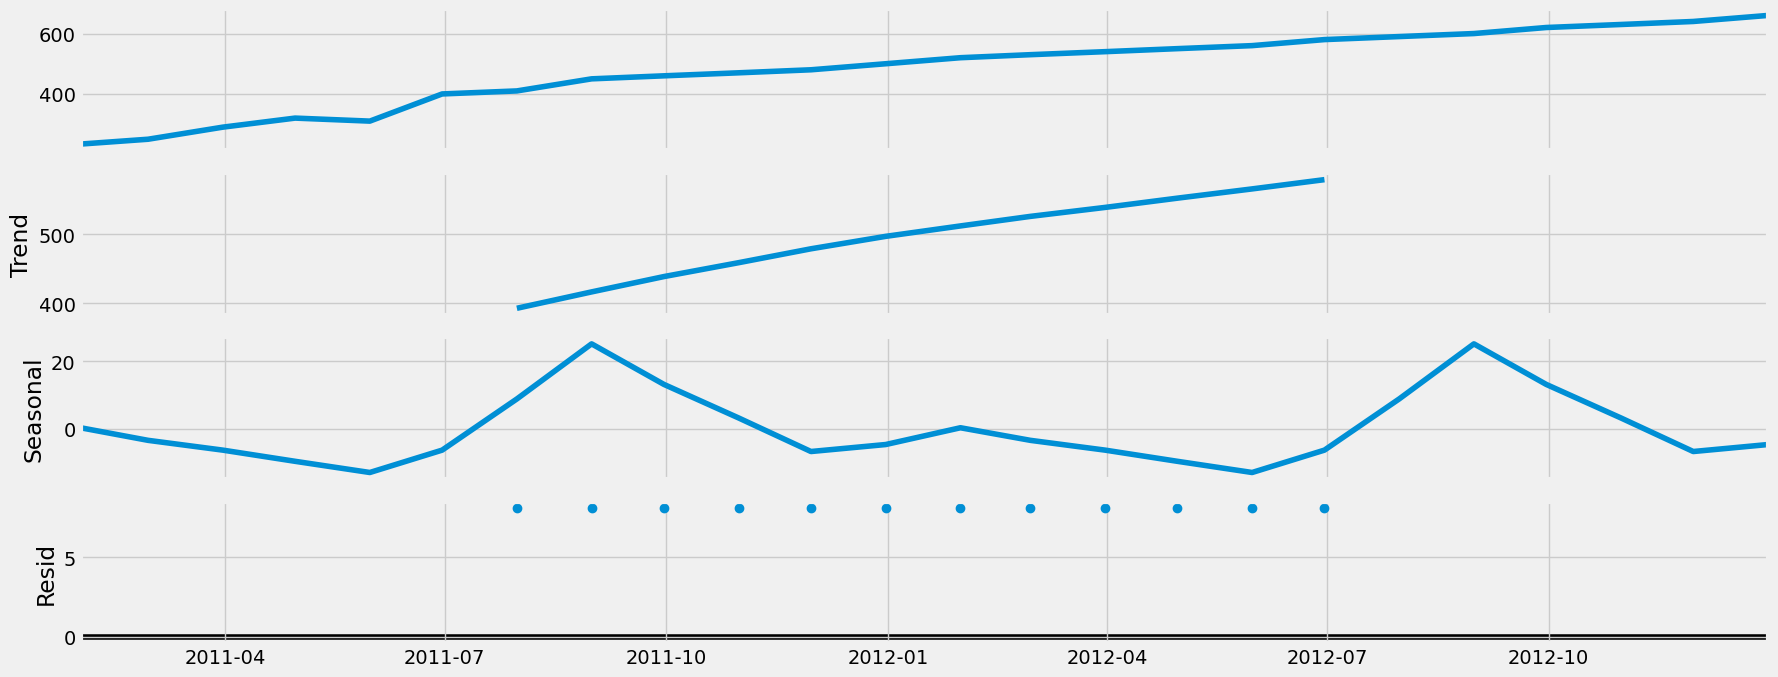

In [169]:
# Plot results
decomposition.plot()
plt.show()

Observations:
There is no strong seasonality though, a peak in the average order date is noticed at the end of 2011. Some interval was also recorded between this period and late 2012. The seasonal period is consistent. Not surprising. 


# 4. Test for stationarity

In [170]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(super_store_sub['Sales'])

Dickey-Fuller Stationarity test:
Test Statistic                  -39.710683
p-value                           0.000000
Number of Lags Used               0.000000
Number of Observations Used    1429.000000
Critical Value (1%)              -3.434934
Critical Value (5%)              -2.863565
Critical Value (10%)             -2.567848
dtype: float64


Observation:

The test statistic (-39.710683) is significantly lower (more negative) than the critical values across all significance levels. This indicates that you can confidently reject the null hypothesis of a unit root, suggesting that the series is stationary.

The p-value (0.000000) further substantiates the rejection of the null hypothesis, indicating that the series is stationary.


# 5. Check for autocorrelations

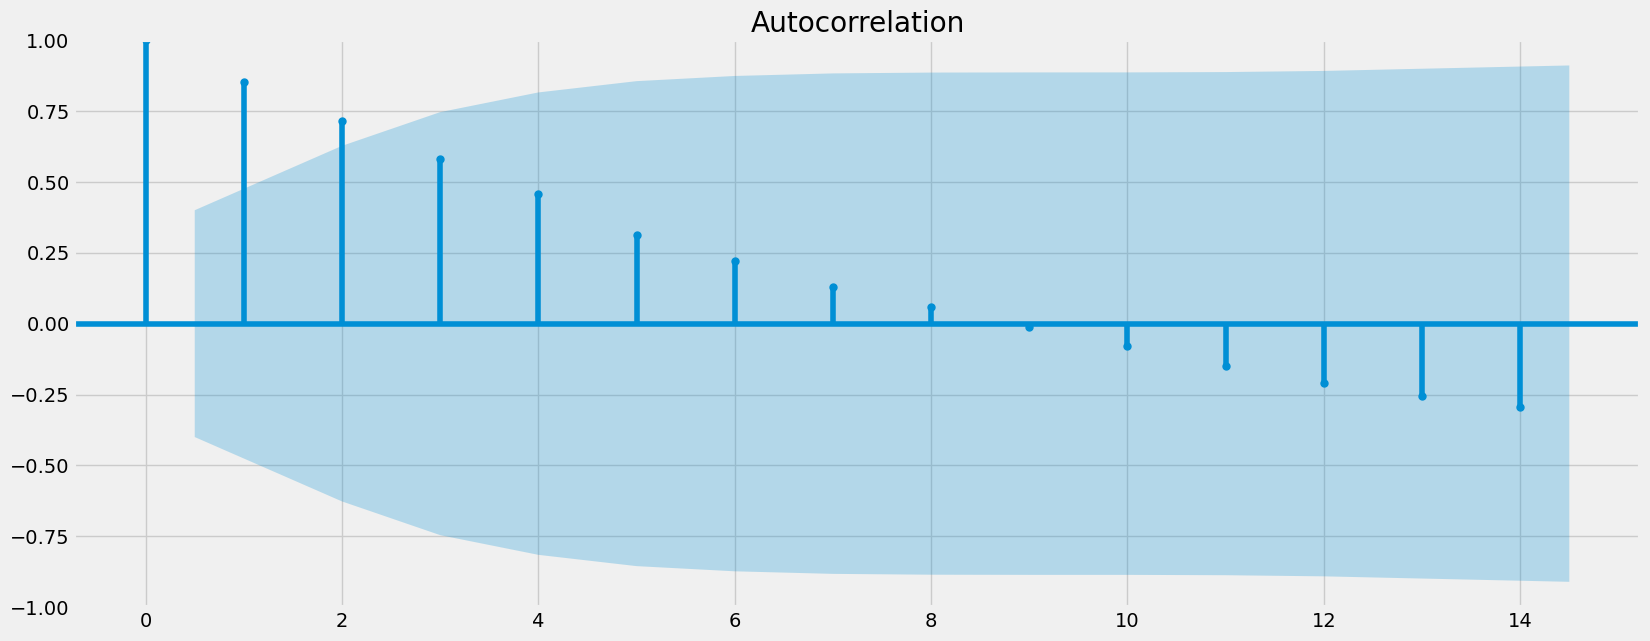

In [172]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data)
plt.show()

Three lags exceed the confidence interval, indicating that the data is not entirely stationary. Nevertheless, the number of lags is sufficiently small, rendering differencing unnecessary.

In [174]:
data_diff = data - data.shift(1)

In [175]:
data_diff.dropna(inplace = True)

In [176]:
data_diff.head()

2011-02-28    16.0
2011-03-31    40.0
2011-04-30    30.0
2011-05-31   -10.0
2011-06-30    90.0
Freq: M, dtype: float64

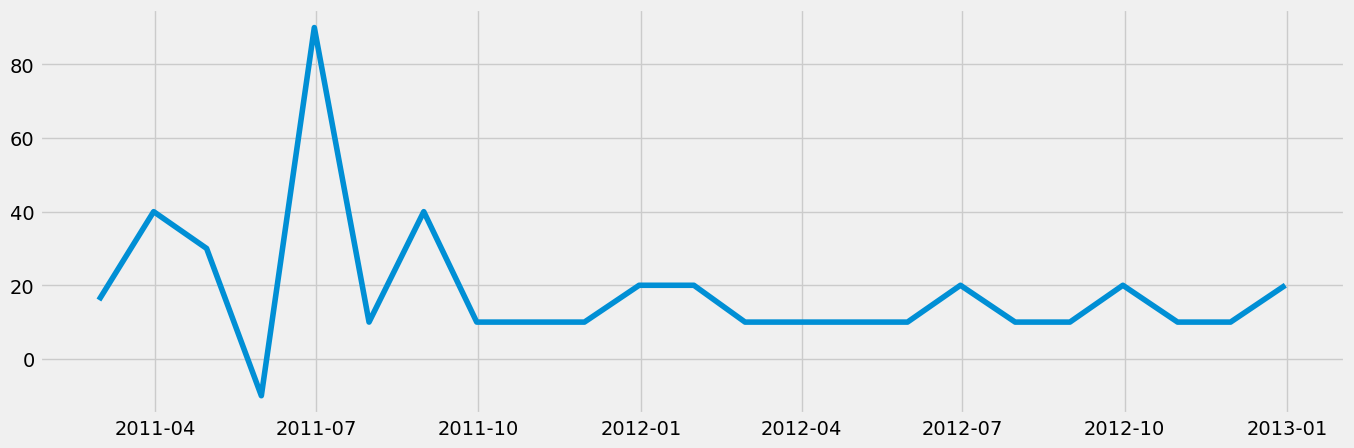

In [178]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [179]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -3.089046
p-value                         0.027375
Number of Lags Used             5.000000
Number of Observations Used    17.000000
Critical Value (1%)            -3.889266
Critical Value (5%)            -3.054358
Critical Value (10%)           -2.666984
dtype: float64


The Test Statistic (-3.089046) marginally exceeds the 5% critical value (-3.054358), suggesting that the time series is stationary at the 5% significance level but not at the 1% level.

The p-value (0.027) corroborates the rejection of the null hypothesis at the 5% significance level, indicating that the series is stationary, notwithstanding moderately.

Stationarity is established, albeit with a less robust confirmation than in instances characterised by a significantly negative test statistic or p-values approaching zero.


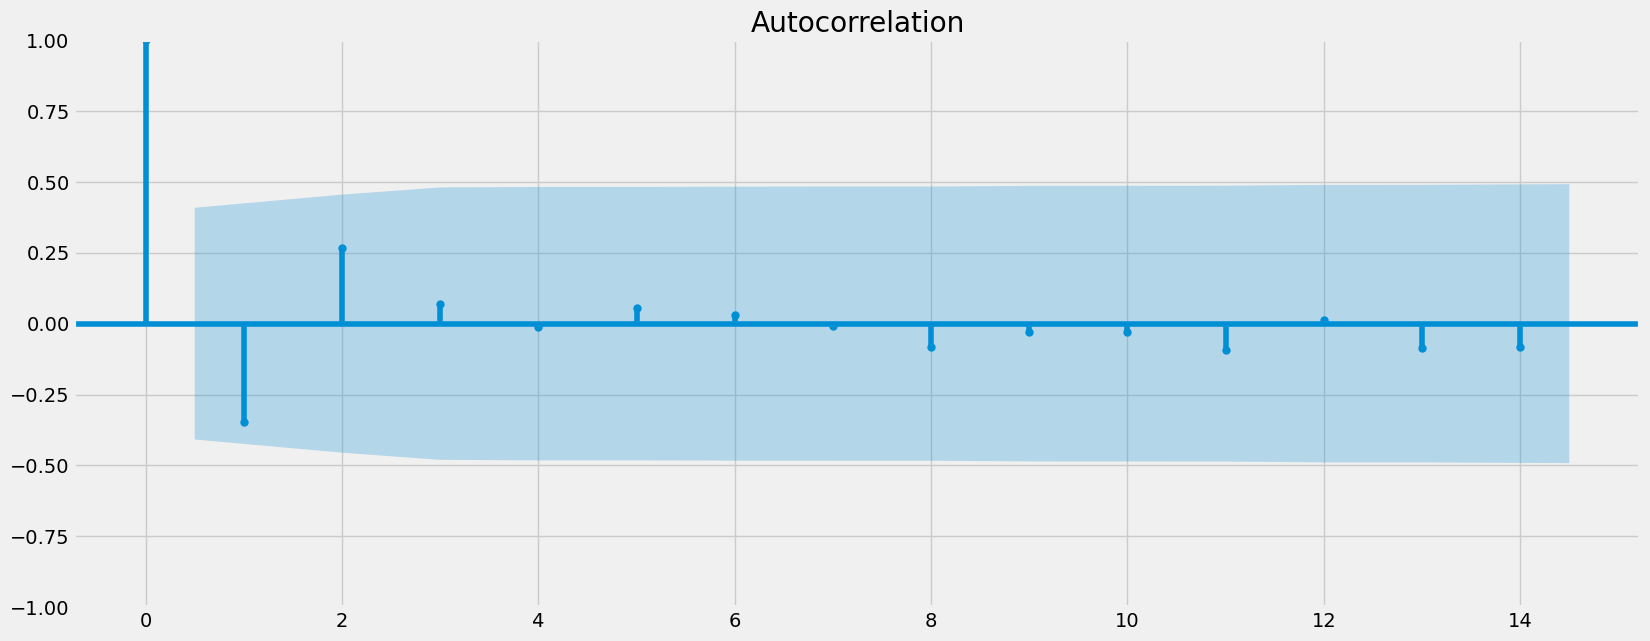

In [180]:
plot_acf(data_diff)
plt.show()

1 lag are above the confidence interval, which means the data is perfectly stationary. 